In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [3]:
df.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.drop(columns=['iso2', 'iso3'])
df.head()

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1. We need to know what's included in this data.

### How many countries are present?

In [5]:
# unique() method pulls all the unique string names in the country column
countries = df.country.unique()
# strip() removes leading and tailing white spaces in the string 
countries = [country.strip() for country in countries]
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ec

In [6]:
# len() gives the no.of countries in the list
len(countries)

219

### What's the timespan of the data?

In [7]:
# the difference of max and min of year column gives the timespan of the data
timespan = (df.year.max() - df.year.min())+ 1
print('Timespan of the data:',timespan,'years')

Timespan of the data: 34 years


### Does each country have a row for every year present?

In [8]:
# the product of (no.of countries) and timespan gives no.of rows in the table if every country has record in every year
# which is refered as expectedRows  
expectedRows = len(countries) * timespan

# actualRows is no.of rows dataframe orginally have 
actualRows = df.shape[0]

expectedRows == actualRows

False

### Which countries are missing years?

In [9]:
# grouping records by country and counting no.of times a country apprered in the data
new_df = df.groupby('country').size().reset_index(name='counts')
# if a country appears every year in data then its count should be equal to timespan
new_df[new_df.counts != timespan]

,country,counts
25,"Bonaire, Saint Eustatius and Saba",4
53,Curacao,4
126,Montenegro,9
135,Netherlands Antilles,30
169,Serbia,9
170,Serbia & Montenegro,25
174,Sint Maarten (Dutch part),4
180,South Sudan,3
192,Timor-Leste,12


### How many rows have at least 1 non-null values across the columns 3-57?

#### Pulling records with not null 

In [10]:
# created a new dataframe named new_df and checked for not null values for the columns 3-57
new_df = df.iloc[0:,3:57].notnull()
new_df

,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,...,newrel_m3544,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,True,False,True,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
7236,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7237,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7238,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [11]:

columns = new_df.columns
new_df['sample'] = False
# performed logical or for every column in the dataframe to find if there exists a row with atleast one not null 
for col in columns:
    new_df['sample'] = new_df['sample'] | new_df[col]

new_df['sample']

0       False
1       False
2       False
3       False
4       False
        ...  
7235     True
7236     True
7237     True
7238     True
7239     True
Name: sample, Length: 7240, dtype: bool

In [12]:
# this gives the all rows with atleast one not null in the columns 3-57
final_df = df[new_df['sample']]
final_df

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
17,Afghanistan,1997,0.0,10.0,6.0,3.0,5.0,2.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Afghanistan,1998,30.0,129.0,128.0,90.0,89.0,64.0,41.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Afghanistan,1999,8.0,55.0,55.0,47.0,34.0,21.0,8.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,Afghanistan,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Afghanistan,2001,129.0,379.0,349.0,274.0,204.0,139.0,103.0,146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,Zimbabwe,2009,125.0,578.0,NaN,3471.0,681.0,293.0,192.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,Zimbabwe,2010,150.0,710.0,2208.0,1682.0,761.0,350.0,252.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7237,Zimbabwe,2011,152.0,784.0,2467.0,2071.0,780.0,377.0,278.0,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7238,Zimbabwe,2012,120.0,783.0,2421.0,2086.0,796.0,360.0,271.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print('The no.of rows with atleast one not null in the columns 3-57 are:',final_df.shape[0])

The no.of rows with atleast one not null in the columns 3-57 are: 3483


# Question 2: Wide data isn't usually helpful.

Convert this to a long format with the following columns:

country
year
diagnosis method: mapping should be:
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
gender: male or female.
age: lower_age - higher_age, e.g., 0-14
number of cases
Note: You can use replace (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

### creating a new dataframe named dfLong by melting the columns to rows in df

In [14]:

dfLong = (
    df.melt(id_vars = ['year','country'], var_name='diagnosis method', value_name='number of cases')
)

dfLong.head()

,year,country,diagnosis method,number of cases
0,1980,Afghanistan,new_sp_m014,NaN
1,1981,Afghanistan,new_sp_m014,NaN
2,1982,Afghanistan,new_sp_m014,NaN
3,1983,Afghanistan,new_sp_m014,NaN
4,1984,Afghanistan,new_sp_m014,NaN


### Extracted age & gender from  ' diagnosis method ' column by iterating through every row 

In [15]:
age = []
gender = []
for x in dfLong['diagnosis method']:
    ageList = x.split('_')
    if len(ageList) == 3:
        gender.append(ageList[2][0])  # extracting gender from string and appending it to the gender list
        ageStr = ageList[2][1:]       # extracting age from string and appending it to the age list
    else:
        gender.append(ageList[1][0])  # extracting gender from string and appending it to the gender list
        ageStr = ageList[1][1:]       # extracting age from string and appending it to the age list
        
    if len(ageStr) == 2:
        age.append(ageStr)
    elif len(ageStr) == 3:
        age.append(ageStr[0]+'-'+ageStr[1:])  # converting the range of age in required format
    else:
        age.append(ageStr[:2]+'-'+ageStr[2:]) # converting the range of age in required format

### Adding age, gender columns to dataframe

In [16]:
# assigning age values to age column
dfLong['age'] = age
# assigning gender values to gender column
dfLong['gender'] = gender

# replacing the m with male and f with female in the gender column
dfLong['gender'].replace({'m':'male','f':'female'},inplace=True)
dfLong.head()

,year,country,diagnosis method,number of cases,age,gender
0,1980,Afghanistan,new_sp_m014,NaN,0-14,male
1,1981,Afghanistan,new_sp_m014,NaN,0-14,male
2,1982,Afghanistan,new_sp_m014,NaN,0-14,male
3,1983,Afghanistan,new_sp_m014,NaN,0-14,male
4,1984,Afghanistan,new_sp_m014,NaN,0-14,male


### Changing the values of the ' diagnosis method ' column into the required format

In [17]:
# used apply() method to convert the name of the diagnosis method into simple format by removing underscores
dfLong['diagnosis method'] = dfLong['diagnosis method'].apply(lambda x:''.join(x.split('_')[:-1]))

In [18]:
dfLong.head()

,year,country,diagnosis method,number of cases,age,gender
0,1980,Afghanistan,newsp,NaN,0-14,male
1,1981,Afghanistan,newsp,NaN,0-14,male
2,1982,Afghanistan,newsp,NaN,0-14,male
3,1983,Afghanistan,newsp,NaN,0-14,male
4,1984,Afghanistan,newsp,NaN,0-14,male


In [19]:
# converting the diagnosis name into more meaningful format using replace() method
dfLong.replace({'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'},inplace=True)
dfLong.head()

,year,country,diagnosis method,number of cases,age,gender
0,1980,Afghanistan,Pulmonary Smear (+),NaN,0-14,male
1,1981,Afghanistan,Pulmonary Smear (+),NaN,0-14,male
2,1982,Afghanistan,Pulmonary Smear (+),NaN,0-14,male
3,1983,Afghanistan,Pulmonary Smear (+),NaN,0-14,male
4,1984,Afghanistan,Pulmonary Smear (+),NaN,0-14,male


In [20]:
dfLong.replace({np.nan:0},inplace=True)

# Question 3: Create a graph that shows when countries started to report TB cases.

### Creating new varible named year_df by using groupby()

In [21]:
# grouped the records according to the year and summed up the no.of cases
year_df = dfLong.groupby('year')['number of cases'].sum()
year_df

year
1980        959.0
1981        805.0
1982        824.0
1983        786.0
1984        814.0
1985        799.0
1986        754.0
1987        670.0
1988        682.0
1989        654.0
1990        549.0
1991        544.0
1992        512.0
1993        492.0
1994        750.0
1995     513971.0
1996     635705.0
1997     733204.0
1998     840389.0
1999     995128.0
2000    1148463.0
2001    1237402.0
2002    1523321.0
2003    1860601.0
2004    2184924.0
2005    2364023.0
2006    2996524.0
2007    3836674.0
2008    3535278.0
2009    3834194.0
2010    3986811.0
2011    3977151.0
2012    3962589.0
2013    3220572.0
Name: number of cases, dtype: float64

### Creating line graph to visualize the values graphically

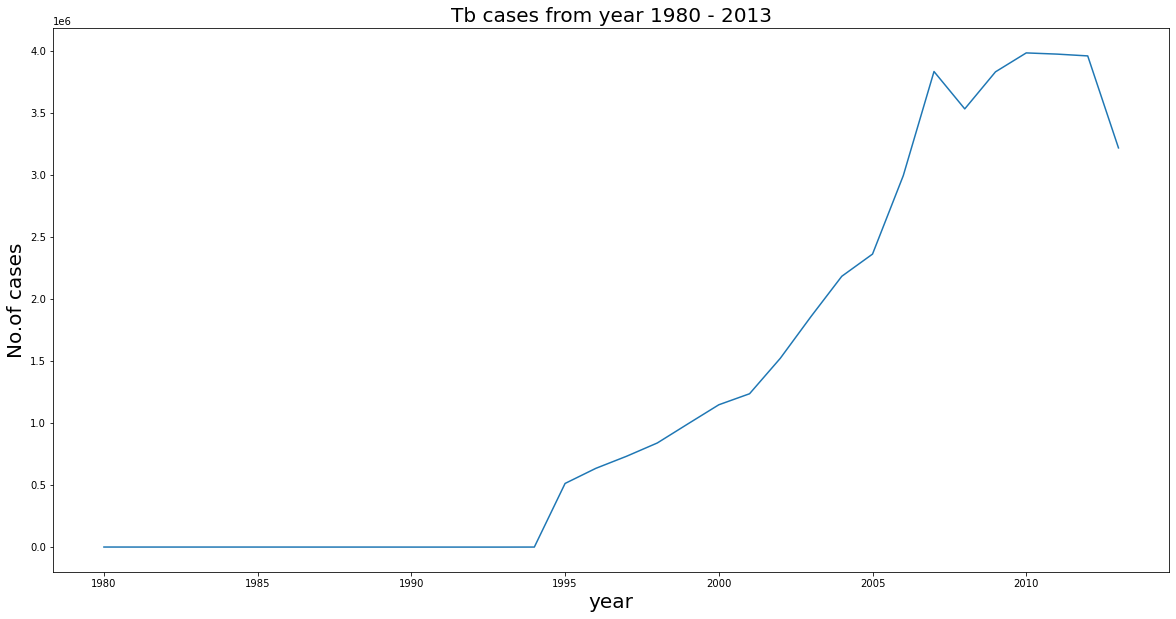

In [22]:
plt.title('Tb cases from year 1980 - 2013',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('No.of cases',fontsize=20)
year_df.plot(rot=0,figsize=(20,10))
plt.show()

### Creating bar plot to visualize the trend in detail

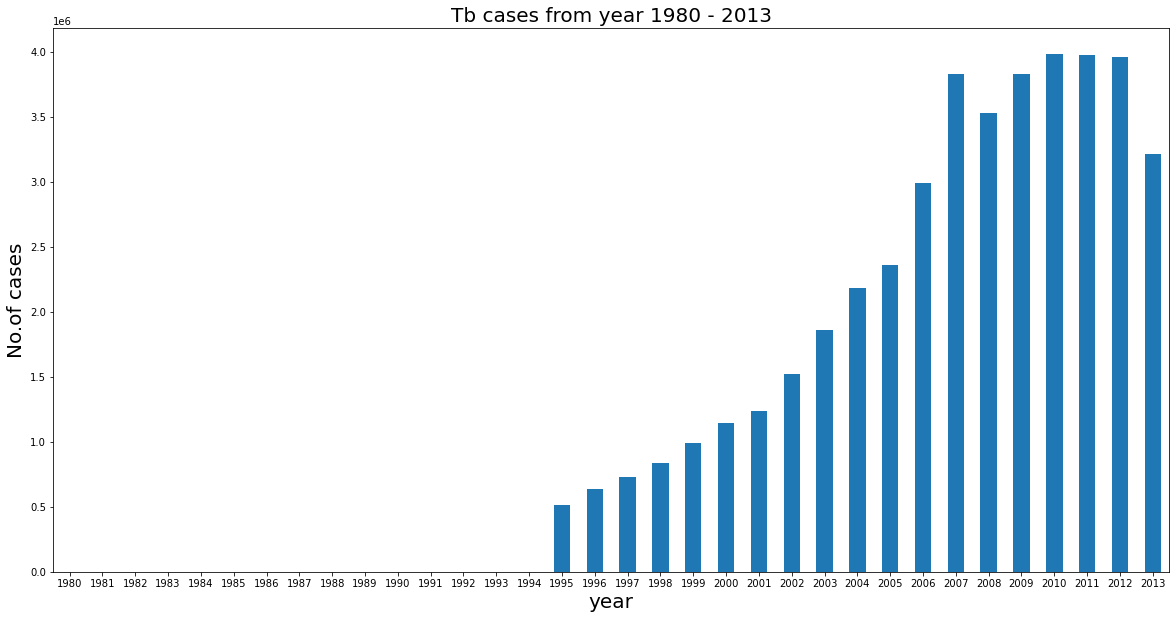

In [23]:
plt.title('Tb cases from year 1980 - 2013',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('No.of cases',fontsize=20)
year_df.plot.bar(rot=0,figsize=(20,10))
plt.show()

#### Insights from above graph
- The Tb cases escalated from year 1995 to 2007 and there was a sudden drop in the year 2008 
- After the sudden drop in 2008 the trend increased till 2010 and then dclined till 2013